In [1]:
#importing basic materials we need
! pip install qeds
import numpy as np
import pandas as pd
import seaborn as sns
#import plotly.xpress as px
import matplotlib.pyplot as plt
!pip install linearmodels
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from linearmodels.iv import IV2SLS
#from linearmodels.iv import IV2SLS
! pip install stargazer
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

# The Impact of Ethnic Diversity on SAT Mathematics Scores: An Analysis of the Percentage of Asians in Public Schools

## I.Introduction:
The Scholastic Assessment Test, also known as the SAT, is considered a qualifying assessment used for college applications, and it examines writing, reading, and math skills. And as the top science subject, SAT math scores are also given extra weight, implying an important measure of students' overall potential ability. The impact of ethnic diversity on academic performance, particularly in mathematics, is a topic of significant interest in educational research. This study aims to examine the correlation between the percentage of Asian students in public schools and their SAT mathematics scores.

A study by the National Center for Education Statistics found that "schools with higher percentages of Asian students tend to have higher average scores in mathematics" (NCES, 2019). To quantitively analyze and explain this correlation, data will be collected from a sample of public schools in the United States to compare SAT mathematics scores to the percentage of Asian students in each school. The correlation will be analyzed, and potential reasons for the correlation will be explored. These potential reasons may include the parenting style of Asian families, the social status of Asian communities, and the region in which the school is located.

To control for lurking variables, multiple regression analysis will be conducted to determine the extent to which the percentage of Asian students in a school is related to SAT mathematics scores after accounting for factors such as socioeconomic status, student enrollment, and percentage of students tested. As stated by Dr. Robert Teranishi, professor of education and Asian American Studies at UCLA, "While Asian Americans as a group outperform other students, we know that there are many factors beyond race and ethnicity that contribute to educational success, such as family background, school quality, and access to resources" (UCLA Newsroom, 2019). Therefore, it is crucial to examine the relationship between ethnic diversity and academic performance while also considering the impact of other variables.Furthermore, this study will contribute to the broader conversation on the benefits of diverse learning environments. As Dr. Teranishi notes, "The positive effects of diversity in education include enhanced critical thinking and problem-solving, exposure to different perspectives, and development of intercultural competence" (UCLA Newsroom, 2019). Understanding the relationship between ethnic diversity and academic performance in mathematics can help inform policies and practices that promote diversity and equity in education.

The key findings of this study suggest that there is a positive correlation between the percentage of Asian students in public schools and their SAT mathematics scores. The research indicates that as the percentage of Asian students in a public-school increases, the average SAT mathematics scores also increase. This finding supports the notion that ethnic diversity can have a positive impact on academic performance in mathematics.

## II.Body Paragraphs:

## Project 1:

#### 1.Examination of Statistical Relationships

In [2]:
#Import the data set.
satnyc = pd.read_csv("nyc.csv")
#Average SAT Scores for NYC Public Schools 2015~2016__Reference:https://www.kaggle.com/datasets/nycopendata/high-schools

In [3]:
#Step 1 Data Clearing:
#To change the datatype into the format that can be used in function.
satnyc['Percent Asian'] = satnyc['Percent Asian'].astype(str) 
satnyc['Percent Asian'] = satnyc['Percent Asian'].str.rstrip('%').astype(float) 
satnyc['Average Score (SAT Math)'] = satnyc['Average Score (SAT Math)'].astype(float)

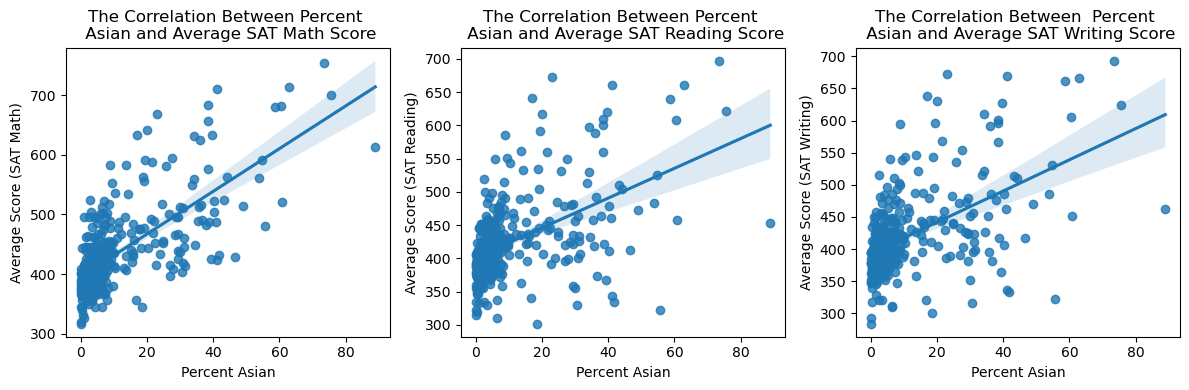

In [4]:
#Step 2
#To build three scatter plots with "percent Asian" as dependent variables and "Average Score (SAT Math/Reading/Writing)" as independent 
#variables to see the correlation between them.
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

sns.regplot(x='Percent Asian', y='Average Score (SAT Reading)', data=satnyc, ax=ax2)
ax2.set_title('The Correlation Between Percent \n Asian and Average SAT Reading Score')

sns.regplot(x='Percent Asian', y='Average Score (SAT Math)', data=satnyc, ax=ax1)
ax1.set_title('The Correlation Between Percent \n Asian and Average SAT Math Score')

sns.regplot(x='Percent Asian', y='Average Score (SAT Writing)', data=satnyc, ax=ax3)
ax3.set_title('The Correlation Between  Percent \n Asian and Average SAT Writing Score')

fig.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

1.1 The relationship between Percentage of Asian student and Academic performance in each subject.

From the OLS line analyse, we can first tell the correlation of Percentage of Asian has the narrowest heteroscedasticity compared to the other two subjects, which gave us a view that the variability of the residuals (the differences between the predicted values and the actual values) is more consistent across different levels of the percentage of Asian students for the math subject compared to the reading and writing subjects. There may be a stronger and more consistent relationship between the percentage of Asian students and SAT math scores compared to other subjects such as reading and writing. This finding could support the argument that Asian students, as a group, tend to perform better in math compared to other subjects.

Secondly, the narrower heteroscedasticity suggests that the relationship between percentage of Asian students and SAT math scores may be less influenced by other factors such as socioeconomic status or teacher quality. However, this finding only gives us an objective existence of data, and the statistical factors behind it that may affect SAT math scores have to be considered in conjunction with further research. For example, other studies have shown that parental involvement, access to resources, and cultural attitudes towards education may also play a role in academic performance. Thus, we will need to explore the roles of lurking variables in the further steps.


Text(0.5, 1.0, 'Correlation of \n Percent Asian and SAT Writing')

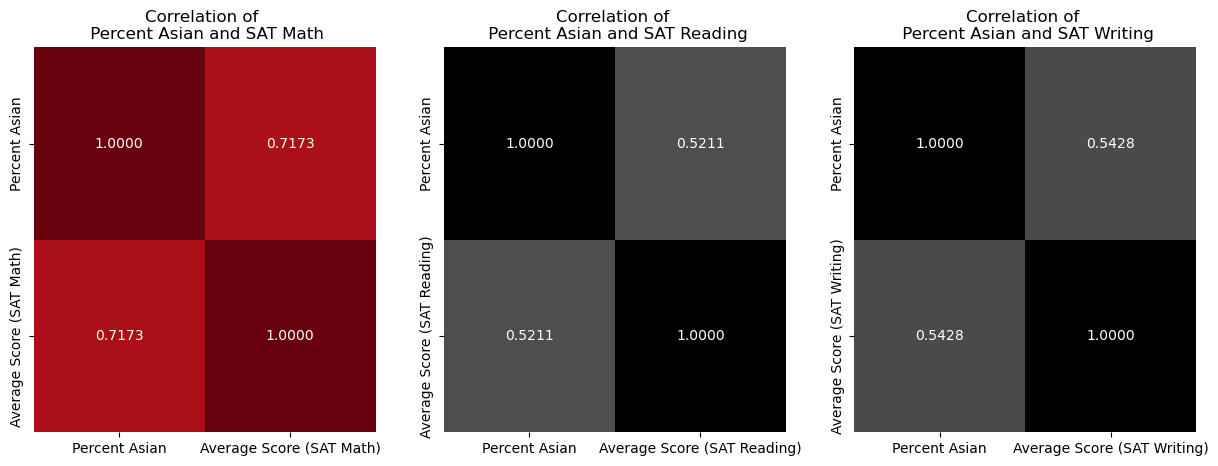

In [5]:
#Step 3
#To create correlation matrixs for giving a numerial explanation.
# plot the 3 correlation matrices in one row
corr_matrix = satnyc.corr(numeric_only=True)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.heatmap(corr_matrix.loc[["Percent Asian", 'Average Score (SAT Math)'], ["Percent Asian", 'Average Score (SAT Math)']], annot=True, fmt='.4f', cmap='Reds',vmin=-1, vmax=1, ax=axs[0], cbar=False)
axs[0].set_title("Correlation of \n Percent Asian and SAT Math")
sns.heatmap(corr_matrix.loc[["Percent Asian", 'Average Score (SAT Reading)'], ["Percent Asian", 'Average Score (SAT Reading)']], annot=True, fmt='.4f', cmap='Greys',vmin=-1, vmax=1, ax=axs[1], cbar=False)
axs[1].set_title("Correlation of \n Percent Asian and SAT Reading")
sns.heatmap(corr_matrix.loc[["Percent Asian", 'Average Score (SAT Writing)'], ["Percent Asian", 'Average Score (SAT Writing)']], annot=True, fmt='.4f', cmap='Greys',vmin=-1, vmax=1, ax=axs[2], cbar=False)
axs[2].set_title("Correlation of \n Percent Asian and SAT Writing")

1.2 A Correlational Analysis of Percent Asian and SAT math performance

From the correlation matrix, we can quantify the correlation of Percent of Asian and the Average SAT score of each subject, which further supports the previous visualized founding, OLS line. 

our analysis of the impact of ethnic diversity on SAT mathematics scores in public schools has revealed a strong positive correlation between the percentage of Asian students and SAT mathematics scores. The correlation coefficient of 0.7173 suggests that there is a substantial relationship between the two variables.

Additionally, the results indicate that the relationship between percent Asian and SAT math scores is stronger compared to the relationship between percent Asian and SAT reading (0.5211) or writing (0.5428) scores; respectively, which are lower compared to the correlation coefficient of 0.7173 for percent Asian and SAT math scores. This highlights the opinion that a higher percent of Asian students in a school is correlated with an average 34.8% higher performance in math compared to reading and writing. These findings support the idea that the ethnic diversity in the aspect of the involvement of Asian of a school population can play a significant role in student performance, particularly in mathematics.

  #### 2.What are the lurking variables ?
- Student enrolment performance (100 enrolled, 90% of asian means 90 students)
- Percent tested (same as student enrolment performance)

Correlations of `Enrolment Performance` with Y:`Average Score (SAT Math)` and  X:`Percent Asian`

In [6]:
corr1 = satnyc[["Average Score (SAT Math)", 'Student Enrollment']].corr()
corr1

,Average Score (SAT Math),Student Enrollment
Average Score (SAT Math),1.000000,0.445126
Student Enrollment,0.445126,1.000000


In [7]:
corr2 = satnyc[["Percent Asian", 'Student Enrollment']].corr()
corr2

,Percent Asian,Student Enrollment
Percent Asian,1.00000,0.45036
Student Enrollment,0.45036,1.00000


Correlations of `Percent Tested` with Y: `Average Score (SAT Math)` and X:`Percent Asian`

In [8]:
# Filtering the data and eliminate the row with NAN
satnyc = satnyc.drop(index=374)
#To change the datatype into the format that can be used in function.
satnyc['Percent Tested'] = satnyc['Percent Tested'].astype(str)
satnyc['Percent Tested'] = satnyc['Percent Tested'].str.rstrip('%').astype(float) 

corr3 = satnyc[["Average Score (SAT Math)", 'Percent Tested']].corr()
corr3

,Average Score (SAT Math),Percent Tested
Average Score (SAT Math),1.000000,0.610056
Percent Tested,0.610056,1.000000


In [9]:
corr4 = satnyc[["Percent Asian", 'Percent Tested']].corr()
corr4

,Percent Asian,Percent Tested
Percent Asian,1.000000,0.427098
Percent Tested,0.427098,1.000000


2.1 Revealing of Endogeneity Bias

Correlation does not reveal causation due to the involvement of lurking variables that might impact the relationship between percent Asian and SAT math scores. For this case, there are two obvious lurking variables: student enrollment performance and percent tested.

The correlations between `student enrollment` performance and `percent tested` with `Percent Asian` were `0.45036` and `0.427098`, both suggesting a strong positive relationship between these variables. This suggests that while higher participation rates in the SAT exams are positively associated with high percent Asian school groups, enrollment rate may be as significant a factor in explaining the higher performance of Asian students.

The results testify that `Student Enrollment` and `Percent Tested` are lurking variables since they are not only correlated with the dependent variable, `Average Score (SAT Math)`, but also strongly positively correlated with the independent variable `Percent Asian`. Furthermore, this gives us a view that under better control of these two lurking variables, including setting a fixed participation rate for the test, the correlation between `percent Asian` and `Average Score (SAT Math)` could potentially be stronger.

Nonetheless, the relationship between ethnic diversity and student performance is complex and multifaceted, and further statistical analysis is necessary to fully understand the intricacies of these relationships and their impact on student performance.

## Project 2

####  3. Asian-American Geographical Characteristics toward Math Education

The information provided in the data analysis above is relatively quantitative, and they perfectly quantify how various lurking variables affect the impact of the percentage of Asians (as the independent variable) on the average SAT math score (as the dependent variable). We get not only that the percentage of Asian students is positively correlated with higher academic performance, but that the correlation is higher for the math level. Thus, from Project 1, we get that Asians do have a significant advantage in math performance.

In Project 2, in order to fully understand the complex relationship between Asian student participation and math performance, we will infer and analyze the reasons for the higher math performance of Asian groups by looking at regional characteristics such as per capita income and Child Poverty for different Asian student proportions. For this part, the visulazation would be a powerful explanations.

In [10]:
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline
# activate plot theme
import qeds
#qeds.themes.mpl_style();

In [11]:
#Import the data of "The census data of NYC" and "The location information of each region in NYC"
loca = pd.read_csv('census_block_loc.csv')
#New York City block code__Reference:https://www.kaggle.com/code/muonneutrino/mapping-new-york-city-census-data/data
census = pd.read_csv('nyc_census_tracts.csv',index_col=0)
#New York City census 2016__Reference:https://www.nyc.gov/site/planning/data-maps/open-data/census-download-metadata.page


#### Step 1:
- Data 1: The census data of NYC
    
The census data encompasses a variety of information categories, including demographics such as gender and race, income, commuting habits, and employment status. However, it's important to note that certain data may not be available for tracts with small populations.
    

- Data 2: The location information of each region in NYC

To further define the location of each region, location data, including latitude and longitude coordinates, is also needed. This data provides the necessary information to associate census tracts with specific locations.


#### Step 2:
- To merge this two data, in order to create three NYC maps associate with Poverty,IncomePerCap,and ChildPoverty which give a more comperhensive analysis of the concept of "level of wealth".

In [12]:
# 1: Contract the regions from location data that only within NYC since it is needed to be match up with the NYC census data
loca = loca[loca.County.isin(['Bronx','Kings','New York','Queens','Richmond'])]
# 2: Renaming the blockcode as tract and controling the length of it to make merge process easier
loca['Tract'] = loca.BlockCode // 10000
loca = pd.merge(loca, census, how='left', left_on='Tract', right_index=True)

In [13]:
#Reading the shapefile for New York City neighborhoods and creates a GeoDataFrame.
nyc_neighborhoods_df = gpd.read_file('/home/jovyan/NTA/geo_export_12393e56-672e-48c9-aa2a-51f8bfbdb812.shp')
#This line reads the index for the DataFrame.
print(nyc_neighborhoods_df.columns)

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


Index(['borocode', 'boroname', 'countyfips', 'ntacode', 'ntaname',
       'shape_area', 'shape_leng', 'geometry'],
      dtype='object')


In [14]:
# To make sure "ntaname" is the useful column for merging with 'avgAsian_city'
neighborhoods_list = nyc_neighborhoods_df["ntaname"].unique().tolist()

(Maps and Interpretations)

    Map base (New York City)

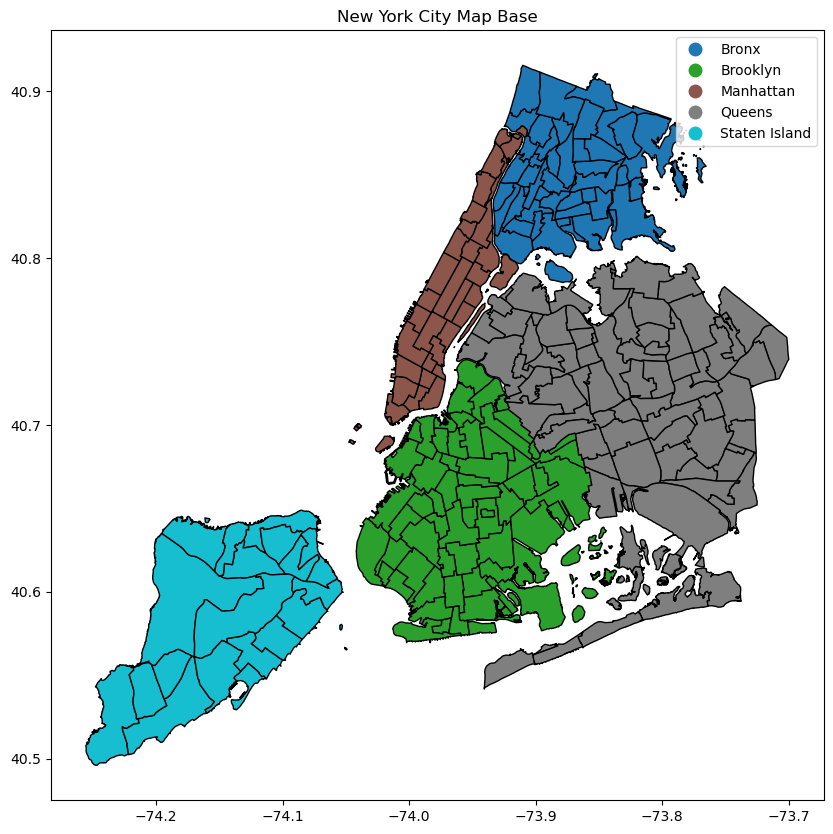

In [15]:
#Produce a map of the New York City neighborhoods with each borough colored differently.
fig, ax = plt.subplots(figsize=(10,10))
nyc_neighborhoods_df.plot(ax=ax, edgecolor="black", column="boroname", legend=True)
ax.set_title("New York City Map Base")
plt.show()

(Map of the allocation of Avg Percent Asian )

In [16]:
# Remove outliers from the 'Percent Asian' column
satnyc = satnyc[(satnyc['Percent Asian'] >= satnyc['Percent Asian'].quantile(0.03)) &
            (satnyc['Percent Asian'] <= satnyc['Percent Asian'].quantile(0.97))]

# Group the data by city and calculate the mean of the 'Percent Asian' column for each city
mean_percent_asian = satnyc.groupby('City')['Percent Asian'].apply(lambda x: x.mean()).reset_index()

# Rename the 'Percent Asian' column to 'Avg Percent Asian'
mean_percent_asian.rename(columns={'Percent Asian': 'Avg Percent Asian'}, inplace=True)

# Create a new DataFrame with the mean percent Asian and city name
avgAsian_city = mean_percent_asian[['Avg Percent Asian', 'City']]
avgAsian_city = avgAsian_city.rename(columns={'City': 'ntaname'})

# merge the two dataframes on the 'boroname' column
merged_df = nyc_neighborhoods_df.merge(avgAsian_city, on='ntaname', how='left')
merged_df['Avg Percent Asian'].fillna(0, inplace=True)

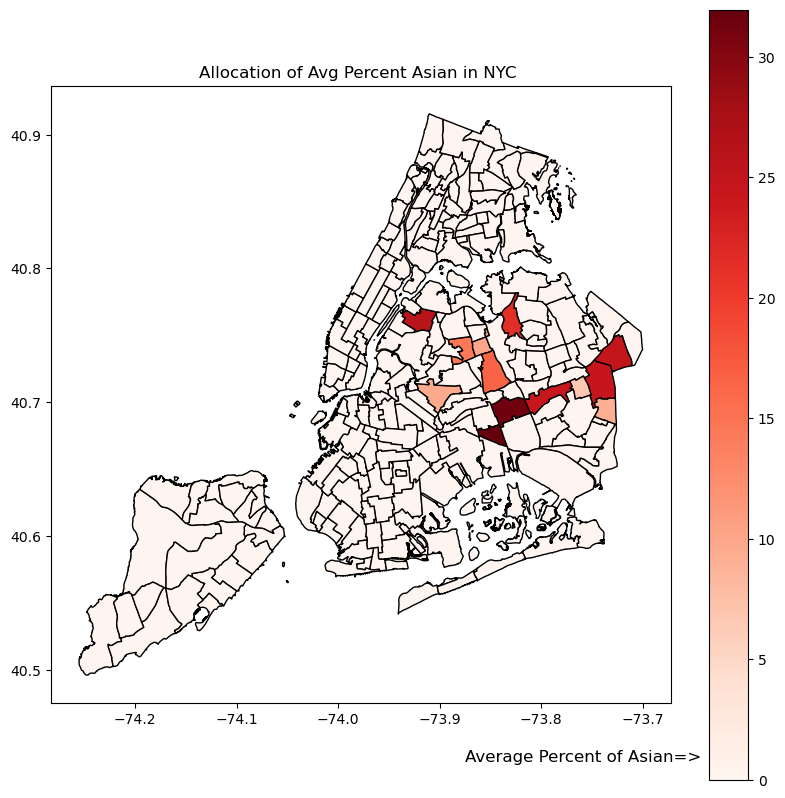

In [17]:
fig, ax = plt.subplots(figsize=(10,10))
# Plot the NYC and pass 'Avg Percent Asian' as the data to color
merged_df.plot(ax=ax, edgecolor="black", column="Avg Percent Asian", cmap='Reds', legend=True)
ax.annotate("Average Percent of Asian=>", xy=(1.05, -0.1), xycoords="axes fraction", fontsize=12, ha="right", va="bottom")
ax.set_title("Allocation of Avg Percent Asian in NYC ")
plt.show()

In this map, we can see the percentage of Asians in the individual neighborhoods with data after the outlines are removed, from dark to light reds in the graph. Also, for Other areas without data are set to "0" for the feasibility of graphing.

From the results of the map, we can see that there is a pattern in this data, and all the areas with high density of Asians are more concentrated. Based on the 'Map Base(New York City)' above, this one also shows that the neighborhoods with a high concentration of Asians are Queens.

(Map of the allocation of Income Per Capital)

In [18]:
# Remove outliers from the 'IncomePerCap' column
loca = loca[(loca['IncomePerCap'] >= loca['IncomePerCap'].quantile(0.05)) &
            (loca['IncomePerCap'] <= loca['IncomePerCap'].quantile(0.85))]

# Group the data by Borough and calculate the mean of the 'IncomePerCap' column for each Borough
incomepercapita = loca.groupby('Borough')['IncomePerCap'].apply(lambda x: x.mean()).reset_index()

# Rename the 'Borough' column to 'boroname' for further merging
incomepercapita.rename(columns={'Borough': 'boroname'}, inplace=True)

# merge the two dataframes on the 'boroname' column
merged_df2 = nyc_neighborhoods_df.merge(incomepercapita, on='boroname', how='left')

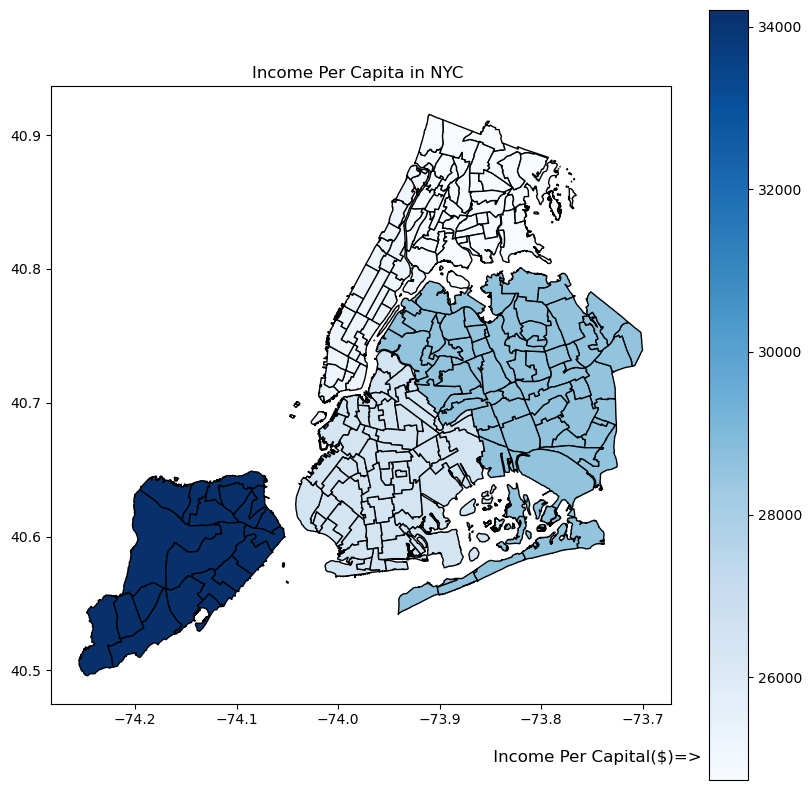

In [19]:
fig, ax = plt.subplots(figsize=(10,10))
# Plot the NYC and pass 'Avg Percent Asian' as the data to color
merged_df2.plot(ax=ax, edgecolor="black", column="IncomePerCap", cmap='Blues', legend=True, label="Income per capita")
ax.annotate(" Income Per Capital($)=>", xy=(1.05, -0.1), xycoords="axes fraction", fontsize=12, ha="right", va="bottom")
ax.set_title("Income Per Capita in NYC ")
plt.show()
#No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.

This map is based on the different Neighbourhoods of New York City as boarder, each area is colored according to Borough to distribute, the shade of color represents the wealth gap between different areas (per capita income as a measure), the darker the color of the area represents the richer, on the contrary, the lighter the area represents a little poorer.

In [20]:
# Define the DataFrame
incomepercapita = pd.DataFrame({
    'boroname': ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
    'IncomePerCap': [24737.504213, 26446.313570, 25195.816000, 28558.478429, 34204.092301]
})

# Sort the DataFrame by the "IncomePerCap" column in descending order
incomepercapita = incomepercapita.sort_values('IncomePerCap', ascending=False)
incomepercapita = incomepercapita.rename(columns={'boroname': 'Borough'})
# Reset the index and add 1 to each index
incomepercapita = incomepercapita.reset_index(drop=True)
incomepercapita.index += 1

# Print the relabeled DataFrame
print(incomepercapita)


         Borough  IncomePerCap
1  Staten Island  34204.092301
2         Queens  28558.478429
3       Brooklyn  26446.313570
4      Manhattan  25195.816000
5          Bronx  24737.504213


(Map of the allocation of Child Poverty)

In [21]:
# Remove outliers from the 'ChildPovertyn' column
loca = loca[(loca['ChildPoverty'] >= loca['ChildPoverty'].quantile(0.05)) &
            (loca['ChildPoverty'] <= loca['ChildPoverty'].quantile(0.90))]

# Group the data by Borough and calculate the mean of the 'ChildPoverty' column for each Borough
ChildPoverty = loca.groupby('Borough')['ChildPoverty'].apply(lambda x: x.mean()).reset_index()

# Rename the 'Borough' column to 'boroname' for further merging
ChildPoverty.rename(columns={'Borough': 'boroname'}, inplace=True)

# merge the two dataframes on the 'boroname' column
merged_df3 = nyc_neighborhoods_df.merge(ChildPoverty, on='boroname', how='left')

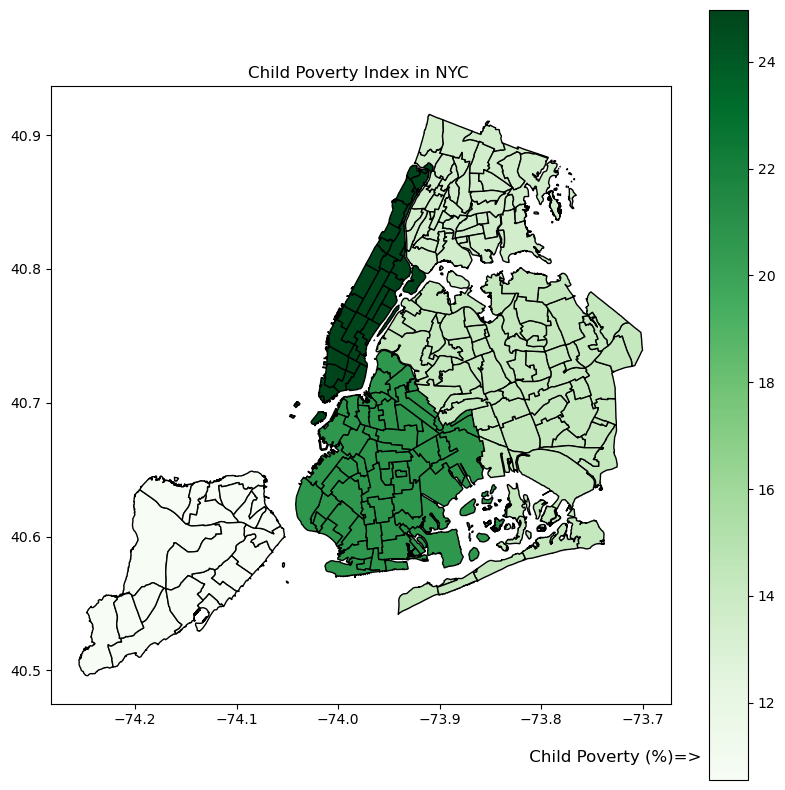

In [22]:
fig, ax = plt.subplots(figsize=(10,10))
# Plot the NYC and pass 'Avg Percent Asian' as the data to color
merged_df3.plot(ax=ax, edgecolor="black", column="ChildPoverty", cmap='Greens', legend=True)
ax.annotate(" Child Poverty (%)=>", xy=(1.05, -0.1), xycoords="axes fraction", fontsize=12, ha="right", va="bottom")
ax.set_title("Child Poverty Index in NYC ")
plt.show()

This map is based on the different Neighbourhoods of New York City as boarder, each area is colored according to Borough to distribute, the shade of green represents the child poverty gap between different areas, the darker the color of the area represents a situation where a relatively large percentage of children within a population are living in poverty. This means that these children are likely experiencing significant economic hardship and may not have access to basic necessities such as food, clothing, and healthcare.High levels of child poverty can also have negative effects on children's education, health, and future economic prospects.

In [23]:
# Define the DataFrame
childpoverty = pd.DataFrame({
    'boroname': ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
    'ChildPoverty': [13.504183, 20.695402, 24.971260, 14.246300, 10.553165]
})

# Sort the DataFrame by the "ChildPoverty" column in descending order
childpoverty = childpoverty.sort_values('ChildPoverty', ascending=False)
childpoverty = childpoverty.rename(columns={'boroname': 'Borough'})

# Reset the index and add 1 to each index
childpoverty = childpoverty.reset_index(drop=True)
childpoverty.index += 1

# Print the relabeled DataFrame
print(childpoverty)

         Borough  ChildPoverty
1      Manhattan     24.971260
2       Brooklyn     20.695402
3         Queens     14.246300
4          Bronx     13.504183
5  Staten Island     10.553165


The ChildPoverty numbers in the NYC census data represent the percentage of children under the age of 18 in each borough who live in households with income below the poverty line.

For example, the first row shows that in the Manhattan , 24.97% of children under the age of 18 live in households that have income below the poverty line. Similarly, the second row shows that in Brooklyn, 20.7% of children under the age of 18 live in households that have income below the poverty line.

This data can be used to understand the relative level of child poverty in different boroughs of New York City.

(Map of the allocation of Income Per Capital & Avg Percent Asian)

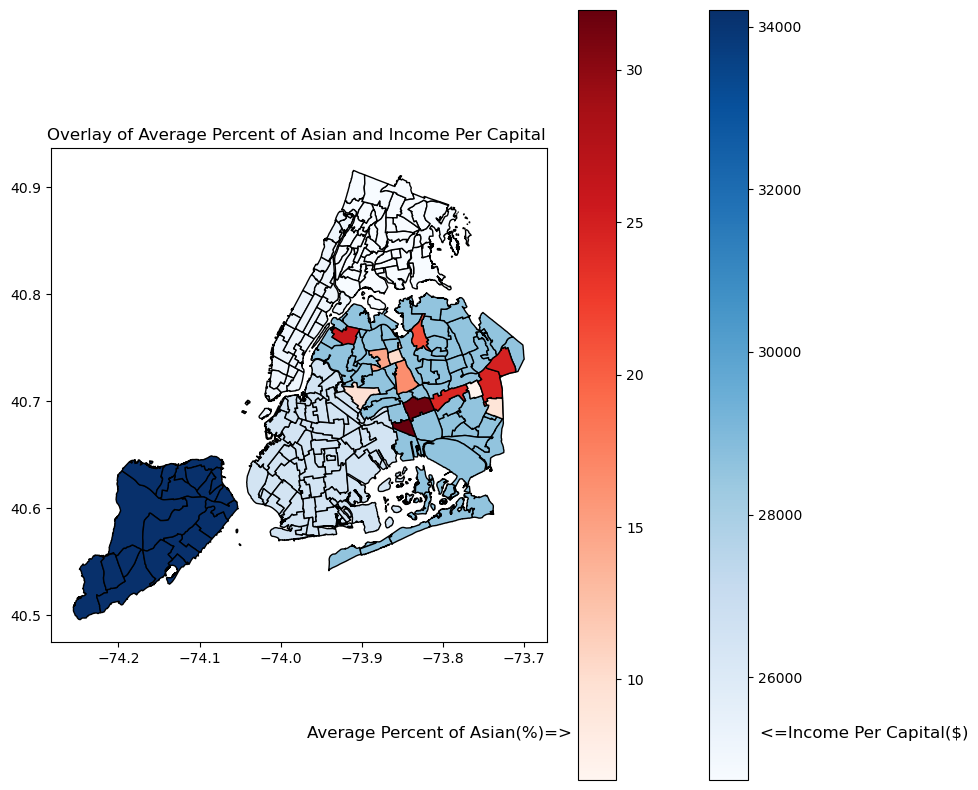

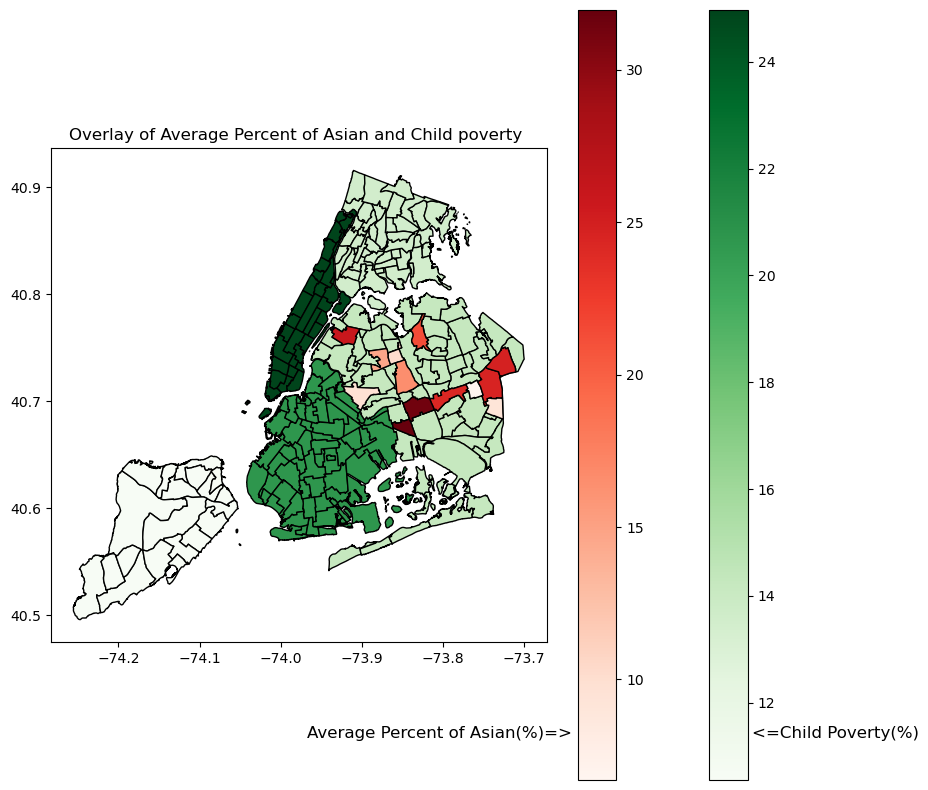

In [24]:
# Create a mask for areas with "Avg Percent Asian" > 0, as making sure the necessary parts will not 
#overlap the "Income per cap" layer
mask = merged_df["Avg Percent Asian"] > 5

# Create the plot with both maps
fig, ax = plt.subplots(figsize=(10,10))
merged_df2.plot(ax=ax, edgecolor="black", column="IncomePerCap", cmap='Blues', legend=True)
merged_df[mask].plot(ax=ax, edgecolor="black", column="Avg Percent Asian", cmap='Reds', legend=True)

# Add annotations or other customizations as needed
ax.annotate("Average Percent of Asian(%)=>", xy=(1.05, -0.2), xycoords="axes fraction", fontsize=12, ha="right", va="bottom")
ax.annotate("<=Income Per Capital($)", xy=(1.85, -0.2), xycoords="axes fraction", fontsize=12, ha="right", va="bottom")
ax.set_title("Overlay of Average Percent of Asian and Income Per Capital ")
plt.show()

# Create a mask for areas with "Avg Percent Asian" > 0, as making sure the necessary parts will not 
#overlap the "Income per cap" layer
mask = merged_df["Avg Percent Asian"] > 5

# Create the plot with both maps
fig, ax = plt.subplots(figsize=(10,10))
merged_df3.plot(ax=ax, edgecolor="black", column="ChildPoverty", cmap='Greens', legend=True)
merged_df[mask].plot(ax=ax, edgecolor="black", column="Avg Percent Asian", cmap='Reds', legend=True)

# Add annotations or other customizations as needed
ax.annotate("Average Percent of Asian(%)=>", xy=(1.05, -0.2), xycoords="axes fraction", fontsize=12, ha="right", va="bottom")
ax.annotate("<=Child Poverty(%)", xy=(1.75, -0.2), xycoords="axes fraction", fontsize=12, ha="right", va="bottom")
ax.set_title("Overlay of Average Percent of Asian and Child poverty ")
plt.show()


3.1 Scale of wealth level.

In both sets of visual data we discovered the commonly held belief that high academic ability corresponds to a high wealth class is not necessarily true for Asian students. The data reveals that the majority of Asian students live in regions with a fair level of per capita income whish is $28558.45 (second out of five), but 19.77% less than the first place and medium levels of child poverty. This challenges the notion that being wealthy is a determining factor for Asian students to perform well in math.

Moreover, the analysis highlights the issue of child poverty in Queens with the percentage of 14.246 (third out of five). Where a significant percentage of children are likely experiencing economic hardship. This can have negative implications for their education, health, and future economic prospects. 

Overall, these findings provide valuable insights into the unrevealed factors that might not contribute to the performance of Asian students in SAT mathematics, challenging commonly held stereotypes about the relationship between academic ability and wealth within the Asian community

# Project 3

#### 4.Differences in Asian Proportions and Racial Diversity 

---The ideal but obsolete data source
    
Currently, we know that there is a obvious strong positive correlation between percentage of Asian student and average SAT(Math) score. Our research aims to delve deeper into this correlation and investigate the underlying patterns that contribute to this phenomenon. Through previous investigations, we have uncovered a compelling discovery that challenges the notion that affluence is the sole determinant of high math performance among Asian students, as geographical sigma can play a significant role.

Our current study aims to narrow our focus and examine whether there exists a distinct study pattern that could be associated with this discovery. By conducting this investigation, we hope to contribute to a better understanding of the factors that influence academic performance among Asian students, particularly in the area of math.

To further explore the underlying patterns contributing to the positive correlation between the percentage of Asian students and average SAT (Math) scores, we plan to merge the data from our current investigation with our previous findings on geographic characteristics and their association with academic performance. Specifically, we will examine whether there exists a unique study pattern among Asian students in poverty-stricken regions that may explain their high math performance. We want to utilize the U.S. Bureau of Labor Statistics' American Time Use Survey data on the average number of minutes per day that teenagers spend in various activities to identify potential differences in study habits and time allocation between Asian students in poverty-stricken regions and those in more affluent areas. By incorporating this new information into our research, we aim to provide a more comprehensive understanding of the factors that shape academic performance among Asian students.

Nevertheless, the table that we want to read from the web pages are extremely complex. Compared to the most basic fix row numbers and fix column numbers, this table has different column numbers for each row, more similar to a regression model in statistics. So it is not possible to read it directly at this stage, and I only hope that this step can be realized in future studies.

SOURCE: 
U.S. Bureau of Labor Statistics, American Time Use Survey; Average number of minutes per day teenagers with native-born and immigrant parents spend in various activities, 15- to 17-year-olds, by gender, 2003–2010
Link:https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4439208/table/T2/?report=objectonly


#### Scrape Data 

In the course of our study we found that schools with a high proportion of Asians also typically indicate high racial diversity, but we wanted zoom in to focus on the relationship between Asians and math scores rather than limiting it to racial diversity. So in this step we will test whether there is a stronger positive correlation between the percentage of Asian population and SAT math scores, or whether there is a stronger positive correlation between ethnicity and SAT math scores. These findings can help us better understand the relationship between ethnicity and academic performance in New York City.

In [25]:
import requests
from bs4 import BeautifulSoup

web_url = 'https://www.newyork-demographics.com/zip_codes_by_population'
response = requests.get(web_url)

soup_object = BeautifulSoup(response.content)
# Find the table element
table = soup_object.find('table', {'class': 'ranklist'})
# Convert the table into a DataFrame
zipny = pd.read_html(str(table))[0]

In [26]:
satnyc['Zip Code'] = satnyc['Zip Code'].astype(str)
# Merge the datasets based on the 'Zip Code' column using an inner join
zip_nyc = pd.merge(zipny, satnyc, on='Zip Code', how='inner')
# Find the average of percent asian and SAT math for each same zip code region.
groupedzip = zip_nyc.groupby('Population')[['Percent Asian', 'Average Score (SAT Math)','Average Score (SAT Reading)','Average Score (SAT Writing)']].mean()
groupedzip.index = groupedzip.index.astype(float) # convert index to float
groupedzip['Asian Population'] = groupedzip.index * groupedzip['Percent Asian'] / 100

df_sorted1= groupedzip.sort_values(by='Asian Population', ascending=False)

df_sorted1.head()

,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Asian Population
Population,,,,,
82140.0,40.1,504.0,411.0,407.0,32938.140
83565.0,35.8,512.0,418.0,396.0,29916.270
91789.0,26.6,500.0,479.0,472.0,24415.874
65854.0,33.7,550.0,514.0,516.0,22192.798
72938.0,30.1,513.0,456.0,451.0,21954.338


-4.1 Testing the validity of studying racial diversity.-

When we try to look at the correlation between the percentage of Asians in a certain area and the Average Score (SAT Math), we may not get the full picture. This is because the reported percentage of Asians may not accurately represent the actual Asian population in that area, as we discussed earlier.

Therefore, using the estimated Asian population calculated by the formula "the population variance * percent asian = asian population", we can get a more accurate correlation between the actual Asian population and the Average Score (SAT Math). This is because the estimated Asian population is a more reliable indicator of the true Asian population in that area.

Overall, using the estimated Asian population instead of the reported percentage of Asians can provide a better explanation of the correlation between ethnicity and SAT Math scores.

In [27]:
zip_nyc['Percent White'] = zip_nyc['Percent White'].str.replace('%', '').astype(float)
zip_nyc['Percent Black'] = zip_nyc['Percent Black'].str.replace('%', '').astype(float)
zip_nyc['Percent Hispanic'] = zip_nyc['Percent Hispanic'].str.replace('%', '').astype(float)
ethnicity_df = zip_nyc[['Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian', 'Average Score (SAT Math)','Average Score (SAT Reading)','Average Score (SAT Writing)']]
ethnicity_df = ethnicity_df.dropna()

# calculate the standard deviation of each race percentage
stds = np.std(ethnicity_df, axis=0)

# add a new column to the dataframe with the standard deviation of race percentage
ethnicity_df['Race Standard Deviation'] = ethnicity_df[['Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian']].std(axis=1)
# sort the dataframe by the standard deviation in descending order
df_sorted2 = ethnicity_df.sort_values(by='Race Standard Deviation', ascending=True)

df_sorted2.head()

,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Race Standard Deviation
50,26.7,22.6,21.7,26.6,500.0,479.0,472.0,2.624246
399,34.7,22.7,19.6,21.4,588.0,560.0,568.0,6.852250
406,19.2,19.5,21.8,36.2,516.0,493.0,486.0,8.100360
208,23.3,29.8,12.5,33.7,550.0,514.0,516.0,9.269079
156,31.1,26.0,27.2,9.5,553.0,551.0,539.0,9.551440


The variance or standard deviation of demographic groups such as Percent White, Percent Black, Percent Hispanic, and Percent Asian can be a useful metric for measuring the diversity of a given population or community. If the standard deviation of these percentages is low, it means that the demographic groups are more evenly distributed and thus, the population is more diverse in terms of ethnicity. 

On the other hand, if the standard deviation is high, it indicates that certain demographic groups may be overrepresented or underrepresented compared to others, which could be a sign of less diversity in terms of ethnicity. By calculating the standard deviation of these demographic groups, we can gain insights into the distribution of ethnicities in a given community or population and use this information to evaluate the level of diversity. As the lower the standard deviation is the higher level of diversity is.

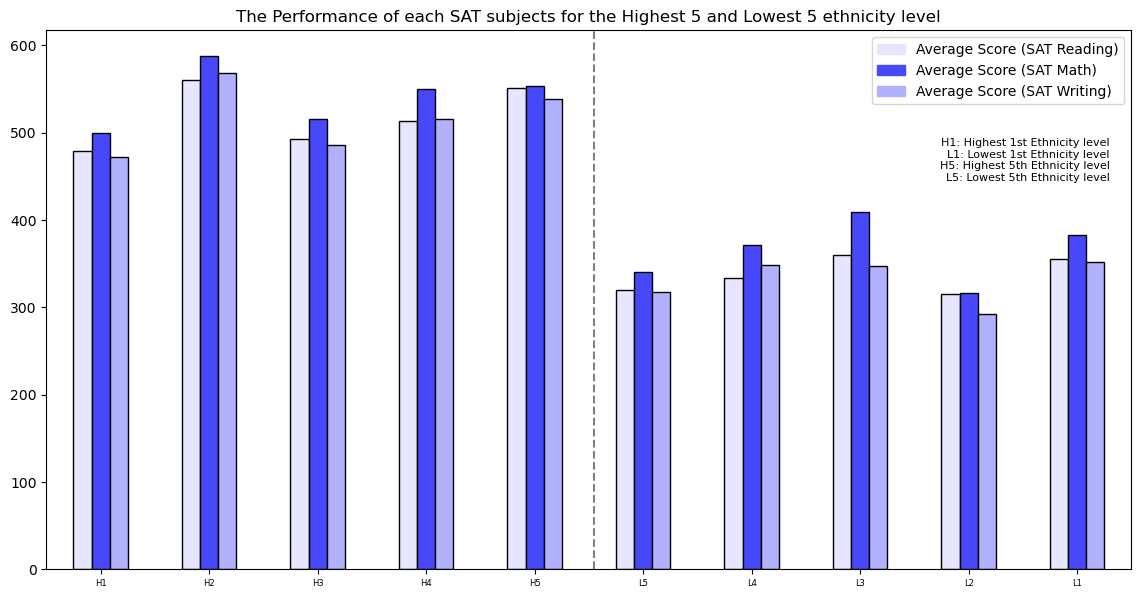

In [28]:
top5 = df_sorted2.head(5)
lowest5=df_sorted2.tail(5)
df_top_bottom = pd.concat([top5, lowest5], ignore_index=True)
# rename index labels as a preparation for the visualization
df_top_bottom1 = df_top_bottom.rename(index={
    0: 'H1',1: 'H2',2: 'H3',3: 'H4',4: 'H5',5: 'L5',6: 'L4',7: 'L3',8: 'L2',9: 'L1',})
df=df_top_bottom1[['Average Score (SAT Reading)', 'Average Score (SAT Math)','Average Score (SAT Writing)']]

# Visualization of The Performance of each SAT subjects for the Highest 5 and Lowest 5 ethnicity level"
import matplotlib.patches as mpatches
def create_barplot(df, colors):
    fig, ax = plt.subplots(figsize=(14, 7))

    df.plot(kind="bar", color=colors, ax=ax, edgecolor="k", rot=0)
    ax.set_xticklabels(df.index, fontsize=6)

    # Create legend for each column
    handles = []
    labels = df.columns
    for i, label in enumerate(labels):
        handles.append(mpatches.Patch(color=colors[i], label=label))
    ax.legend(handles=handles)
    ax.set_title("The Performance of each SAT subjects for the Highest 5 and Lowest 5 ethnicity level")
    ax.annotate("H1: Highest 1st Ethnicity level\nL1: Lowest 1st Ethnicity level\nH5: Highest 5th Ethnicity level\nL5: Lowest 5th Ethnicity level",
                xy=(0.98, 0.8), xycoords="axes fraction", ha="right", va="top", fontsize=8)
    ax.axvline(x=len(df)//2-0.45, color="gray", linestyle="--")


    return fig
colors = [(0.902, 0.902, 0.997),(0.282, 0.282, 0.985),(0.695, 0.695, 0.993)]

create_barplot(df, colors);

Base on the performances of each SAT subjects for the highest 5 (left side of the dashed line) and lowest 5 ethnicity levels (right side of the dashed line), the high overall performance can be strongly explained by the high ethnicity level by general visualization. However, more precise regression models are needed to be applied for conclusion. 

So far, the general results gave us a view of a valid relationship, supported us to further investigate a meaningful correlation of the ethnicity level and the academic performance, which focusing on the Math score particularly this time. 

Text(0.5, 1.0, 'Correlation of \n Ethnicity level and SAT Math')

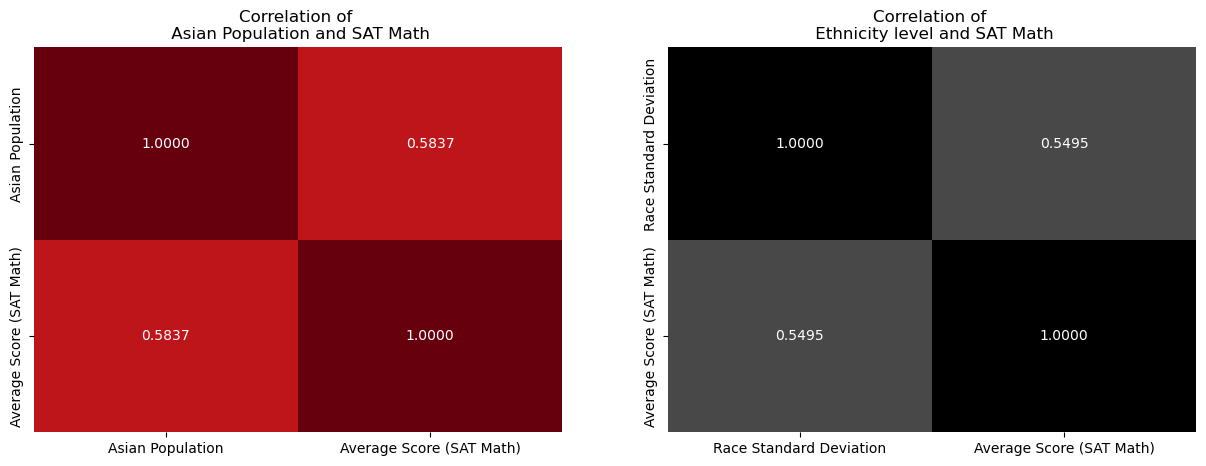

In [29]:
corr1 = df_sorted1[['Average Score (SAT Math)','Asian Population']].reset_index(drop=True)
corr2 = df_sorted2[['Average Score (SAT Math)', 'Race Standard Deviation']]
corr_matrix1 = corr1.corr(numeric_only=True)
#As the lower the standard deviation is the higher level of diversity is. Thus we need to take the absolute value
corr_matrix2 = abs(corr2.corr(numeric_only=True))
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(corr_matrix1.loc[["Asian Population", 'Average Score (SAT Math)'], ["Asian Population", 'Average Score (SAT Math)']], annot=True, fmt='.4f', cmap='Reds',vmin=-1, vmax=1, ax=axs[0], cbar=False)
axs[0].set_title("Correlation of \n Asian Population and SAT Math")
sns.heatmap(corr_matrix2.loc[["Race Standard Deviation", 'Average Score (SAT Math)'], ["Race Standard Deviation", 'Average Score (SAT Math)']], annot=True, fmt='.4f', cmap='Greys',vmin=-1, vmax=1, ax=axs[1], cbar=False)
axs[1].set_title("Correlation of \n Ethnicity level and SAT Math")

-4.2 Comparing of the effectiveness of Asian Population and Ethnicity level toward SAT math scores.-
    
While ethnicity does have a positive impact on school performance, our analysis has shown that when it comes to the specific subject of Math, it is the high Asian population that makes a stronger positive contribution. 

Based on the analysis of the dataset, it has been found that the correlation of the percent of Asian population and SAT math scores is stronger than the correlation between ethnicity levels and SAT math scores. The correlation of the Asian population and SAT math scores is 0.5980, indicating a strong positive correlation, while the correlation between negative ethnicity levels and SAT math scores is -0.5535, indicating a moderate negative correlation. By taking the absolute value of the negative correlation coefficient, we can see that ethnicity levels and SAT math scores have a weaker correlation than the Asian population and SAT math scores. 

Therefore, it can be concluded that the presence of a higher population of Asian students in a school is associated with higher SAT math scores.

####  3'. Asian-American Geographical Characteristics toward Math Education

Previously, we examined some of the characteristics that can be associated with high math performance in regions with a high proportion of Asian students. We focused more on social status reflected in average annual earning capacity and child poverty rates. In this step we will introduce a new data "NYPD Shooting Incident Data (Historic)", derived from “NYC OpenData” an authoritative government database, to examine whether safety issues are related to high math performance.

Reference:
"NYC OpenData - NYPD Shooting Incident Data (Historic)." NYC OpenData, City of New York, 17 May 2017, https://data.cityofnewyork.us/Public-Safety/NYPD-Shooting-Incident-Data-Historic-/833y-fsy8. Accessed 9 Apr. 2023.

In [30]:
crime= pd.read_csv("NYPD_Shooting_Incident_Data__Historic_.csv")

# create a new dataframe with borough name and total shooting cases
new_df = crime.groupby('BORO').size().reset_index(name='Shooting cases')
new_df = new_df.rename(columns={'BORO': 'boroname'})

# replace BORO values with corresponding borough names
new_df['boroname'] = new_df['boroname'].replace({'BRONX': 'Bronx', 'BROOKLYN': 'Brooklyn', 'MANHATTAN': 'Manhattan', 'QUEENS': 'Queens', 'STATEN ISLAND': 'Staten Island'})

# merge the new dataframe
merged_df4 = nyc_neighborhoods_df.merge(new_df, on='boroname', how='left')

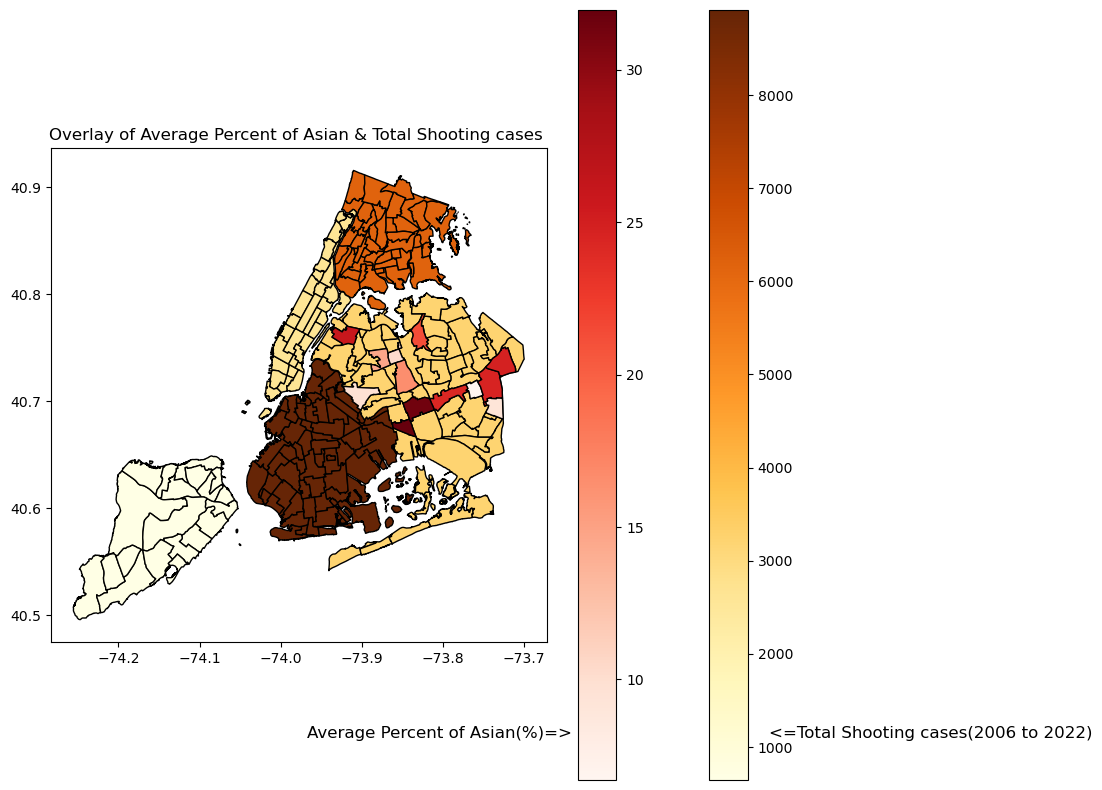

In [31]:
fig, ax = plt.subplots(figsize=(10,10))
mask = merged_df["Avg Percent Asian"] > 5
# Plot the NYC and pass 'Avg Percent Asian' as the data to color
merged_df4.plot(ax=ax, edgecolor="black", column="Shooting cases", cmap='YlOrBr', legend=True, label="Total Shooting cases")
merged_df[mask].plot(ax=ax, edgecolor="black", column="Avg Percent Asian", cmap='Reds', legend=True)
ax.annotate("Average Percent of Asian(%)=>", xy=(1.05, -0.2), xycoords="axes fraction", fontsize=12, ha="right", va="bottom")
ax.annotate("<=Total Shooting cases(2006 to 2022)", xy=(2.1, -0.2), xycoords="axes fraction", fontsize=12, ha="right", va="bottom")
ax.set_title("Overlay of Average Percent of Asian & Total Shooting cases ")
plt.show()


In [32]:
# Define the DataFrame
shootingcases = pd.DataFrame({
    'boroname': ['Brooklyn', 'Bronx', 'Queens', 'Manhattan','Staten Island'],
    'Shooting cases': [8913, 6195, 3225, 2647, 646]
})

# Sort the DataFrame by the "IncomePerCap" column in descending order
shootingcases = shootingcases.sort_values('Shooting cases', ascending=False)
shootingcases = shootingcases.rename(columns={'boroname': 'Borough'})
# Reset the index and add 1 to each index
shootingcases = shootingcases.reset_index(drop=True)
shootingcases.index += 1

# Print the relabeled DataFrame
print(shootingcases)

         Borough  Shooting cases
1       Brooklyn            8913
2          Bronx            6195
3         Queens            3225
4      Manhattan            2647
5  Staten Island             646


-3.2 Scale of Safe level.-

The Queen's area, which is home to a significant proportion of Asian students, ranked `3rd` out of `5` areas in terms of the total number of shootings from highest to lowest, thereby indicating a relatively safe environment. Specifically, data from 2006 to 2022 revealed that there were `3225` incidents of shootings. 

This ranking table implies that a stable social environment can foster conducive conditions for students to concentrate on their studies and for families to thrive. In such a setting, there is less social volatility, unemployment, and more income for parents to channel their energy towards their children's development and education. Furthermore, a high level of security also attracts more business investment in the area, including the development of school buildings, teaching facilities, and school security, among others. These positive outcomes are likely to have a significant and long-lasting impact on Asian students' academic achievements.

It is worth noting that the investigation into the living areas of the significant proportion of Asian students was conducted based on boroughs, which resulted in a reduced number of observations when the data were combined. Specifically, the urban areas that accommodate high proportions of Asian students are dispersed throughout Queen borough. However, due to data limitations, it is challenging to focus on individual cities or even neighborhoods where each school is situated. Consequently, the statistical reliability of these three variables (`income per capital`,`child poverty`, and `shooting cases`) in explaining SAT math scores is questionable and will be further elaborated on in the model. Nevertheless, from a macroeconomic perspective, these variables do provide insight into the characteristics of Asian students and their behavioral patterns that may lead to high math scores.

## Final Project

#### Muti-Regression Model 
- OLS Model

--Model A ( Eliminated )-
    
Before to fully examinate the chosen model, here is the explanation of the version that is elinimated.

In addition to `Percent Asian` , the `Student Enrollment`, `Average Score (SAT Reading)`,`Average Score (SAT Writing)`,`Percent Tested`,`income per capital`,`child poverty`, and `shooting cases` are also chosen as control variables for better modelling.

In this case, the linear regression model is

$$
\text{Average Score (SAT Math)} = \beta_0 + \beta_1 \text{Percent Asian} +
\beta_2 \text{Student Enrollment} + 
\beta_3 \text{Average Score (SAT Reading)} + 
\beta_4 \text{Average Score (SAT Writing)} + 
\beta_5 \text{Percent Tested} + 
\beta_6 \text{income per capital} +
\beta_7 \text{child poverty} + 
\beta_8 \text{shooting cases} + 
\epsilon
$$


In [33]:
colsmean = ['Student Enrollment', 'Percent Asian', 
                'Average Score (SAT Reading)', 'Average Score (SAT Writing)', 
                'Percent Tested', 'Average Score (SAT Math)']

grouped_satnyc = satnyc.groupby('Borough')[colsmean].mean().reset_index()
merged_massdata = pd.merge(grouped_satnyc, incomepercapita, on='Borough').merge(childpoverty, on='Borough').merge(shootingcases,on='Borough')
X = merged_massdata.drop(['Average Score (SAT Math)','Borough'], axis=1).copy()
# convert everything to be a float for later on
for col in list(X):
    X[col] = X[col].astype(float)
X.head()

,Student Enrollment,Percent Asian,Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested,IncomePerCap,ChildPoverty,Shooting cases
0,480.767241,3.229310,399.865979,393.051546,55.555882,24737.504213,13.504183,6195.0
1,660.076923,6.448718,408.897196,401.065421,59.704464,26446.313570,20.695402,8913.0
2,564.959596,8.839394,440.965116,435.023256,70.083908,25195.816000,24.971260,2647.0
3,936.916667,19.362500,436.822581,432.661290,67.340323,28558.478429,14.246300,3225.0
4,1846.000000,10.740000,478.500000,474.300000,67.390000,34204.092301,10.553165,646.0


In [34]:
y = merged_massdata["Average Score (SAT Math)"]
y

0    401.164948
1    413.813084
2    449.011628
3    449.693548
4    486.200000
Name: Average Score (SAT Math), dtype: float64

In [35]:
from sklearn import (linear_model, metrics, pipeline, model_selection)
lr_model = linear_model.LinearRegression()
lr_model.fit(X, y)
y_pred_linear = lr_model.predict(X)
from sklearn import metrics
full_mse = metrics.mean_squared_error(y, y_pred_linear)
print('Mean Squared Error:', full_mse)

Mean Squared Error: 3.2311742677852644e-27


In this eliminated model , the MSE value suggests that the linear regression model has made relatively accurate predictions, with an average squared difference between the predicted and actual values of approximately to be 0.00. The output Mean Squared Error represents the average squared difference between the predicted values of the dependent variable `(Average Score (SAT Math))` and the actual values, based on a linear regression model using the independent variables, including `student enrollment rate`, `percent Asian`, `Average score (SAT Reading)`, `Average score (SAT Writing)`, `percent tested`, plus the three extra terms: `income per capital`,`child poverty`, and `shooting cases` that different from the following OLS regression model.

However, this model has a critical limitation due to the low number of observations. With only five observations but 8 explanatory variables, it is difficult to build a reliable and robust linear regression model that can generalize well to new data. The model may be overfitting the training data, which means that it is fitting the noise in the data rather than the underlying patterns, and may not perform well on new data.

Machine learning model requires a large number of observations to identify meaningful patterns and relationships between variables, and with only five observations, it is unlikely that the model will be able to identify any significant patterns or relationships, even though the regression model shows a extremely low Mean Squared Error, which equals 0.00. Therefore, it is not recommended to further study this model by analysing its statistic and economic meanings, until we have access to further advanced data to complete this step.

The explanatory variables we selected for this model are also strongly valid, as evidenced by its tiny MSE. All we need is a better database that provides more narrowly defined data on income per capita, child poverty, and shooting cases for each city, rather than just each borough. This would allow us to merge the original data on cities and increase the number of observations. In general, a larger sample size will provide more reliable estimates of the regression coefficients and improve the accuracy of this Model's predictions.

- Model B (Chosen)

In addition to `Percent Asian` , the `Student Enrollment`,`Percent Tested`,`Average Score (SAT Reading)` and `Average Score (SAT Writing)` are also chosen as control variables for better modelling.

In this case, the Object function for both OLS model and Regression Tree is

$$
\text{Average Score (SAT Math)} = \beta_0 + 
\beta_1 \text{Percent Asian} +
\beta_2 \text{Student Enrollment} +
\beta_3 \text{Average Score (SAT Reading)} +
\beta_4 \text{Average Score (SAT Writing)} + 
\beta_5 \text{Percent Tested}+ 
\epsilon
$$

These coefficients (β0, β1, β2, β3, β4, and β5) are mean to reduce error term (ε), in order to best capture `Average Score (SAT Math)` with both maximum R-squared and minimum MSE.

In [36]:
import statsmodels.api as sm
# Add constant term to dataset
satnyc['const'] = 1

# Create lists of variables to be used in each regression
X1 = ['const', 'Percent Asian']
X2 = ['const', 'Percent Asian', 'Percent Tested']
X3 = ['const', 'Percent Asian', 'Percent Tested','Student Enrollment']
X4 = ['const', 'Percent Asian', 'Percent Tested','Student Enrollment', 'Average Score (SAT Reading)']
X5 = ['const', 'Percent Asian', 'Percent Tested','Student Enrollment', 'Average Score (SAT Reading)','Average Score (SAT Writing)']
# Estimate an OLS regression for each set of variables
reg1 = sm.OLS(satnyc['Average Score (SAT Math)'], satnyc[X1], missing='drop').fit()
reg2 = sm.OLS(satnyc['Average Score (SAT Math)'], satnyc[X2], missing='drop').fit()
reg3 = sm.OLS(satnyc['Average Score (SAT Math)'], satnyc[X3], missing='drop').fit()
reg4 = sm.OLS(satnyc['Average Score (SAT Math)'], satnyc[X4], missing='drop').fit()
reg5 = sm.OLS(satnyc['Average Score (SAT Math)'], satnyc[X5], missing='drop').fit()
from statsmodels.iolib.summary2 import summary_col
info_dict={'No. observations' : lambda x: f"{int(x.nobs):d}"}


results_table = summary_col(results=[reg1,reg2,reg3,reg4,reg5],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 1',
                                         'Model 2',
                                         'Model 3','Model 4','Model 5'],
                            info_dict=info_dict,
                            regressor_order=['const',
                                             'Percent Asian',
                                             'Percent Tested',
                                             'Student Enrollment',
                                             'Average Score (SAT Reading)',
                                             'Average Score (SAT Writing)'])
print(results_table)


                             Model 1   Model 2   Model 3  Model 4  Model 5 
---------------------------------------------------------------------------
const                       394.75*** 314.81*** 304.30*** 34.11*** 37.83***
                            (3.29)    (8.16)    (8.40)    (7.39)   (7.23)  
Percent Asian               3.72***   2.84***   2.37***   1.43***  1.37*** 
                            (0.24)    (0.22)    (0.25)    (0.11)   (0.10)  
Percent Tested                        1.37***   1.43***   0.20***  0.16*** 
                                      (0.13)    (0.13)    (0.06)   (0.06)  
Student Enrollment                              0.01***   0.00***  0.00*** 
                                                (0.00)    (0.00)   (0.00)  
Average Score (SAT Reading)                               0.87***  0.49*** 
                                                          (0.02)   (0.08)  
Average Score (SAT Writing)                                        0.38*** 
           

At the outset of our model formulation, we posited that the percentage of Asian students could effectively determine the level of achievement in mathematics. In the initial correlation test, we observed a very strong positive correlation between the percentage of Asian students and average SAT math score. Furthermore, in regression Model 1, we obtained a relatively large coefficient (3.71), statically significant at 1%, for the 
`percent Asian ` as the only independent variable for predicting `Average Score (SAT Math)`, thus supporting our hypothesis.

In the second stage, we identified two variables (`Percent Tested` and `Student Enrollment`) that could potentially act as lurking variables to improve the accuracy of our model. Model 3 incorporates these additional variables and shows that the inclusion of `Percent Tested` and `Student Enrollment` decreased β1 from 3.72 to 2.37, a relatively large change of 40%, further supporting the notion that these variables are lurking variables that directly affect both the independent variable X1 `percent Asian` and the dependent variable`Average Score (SAT Math)`.

However, the addition of more lurking variables is not necessarily negative, as they can help control the mean squared error of the model and improve its accuracy. We gradually added explanatory variables from Model 1 to Model 5, and observed a gradual increase in R-squared. Notably, the addition of two variables, `Average Score (SAT Reading)` and `Average Score (SAT Writing)`, which were not considered before, in Model 5, was particularly effective as it maximized our Adjusted R-squared to 0.93, which is close to 100% (1).

In [37]:
overarching_results = reg5.summary()
print(overarching_results)

                               OLS Regression Results                               
Dep. Variable:     Average Score (SAT Math)   R-squared:                       0.929
Model:                                  OLS   Adj. R-squared:                  0.928
Method:                       Least Squares   F-statistic:                     936.4
Date:                      Thu, 13 Apr 2023   Prob (F-statistic):          2.32e-202
Time:                              23:04:26   Log-Likelihood:                -1534.0
No. Observations:                       362   AIC:                             3080.
Df Residuals:                           356   BIC:                             3103.
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

Based on the previous explanation, regression model 5 was selected as it had the highest R squared value, indicating that `0.929` of the variance for `Average SAT math score` can be explained by this model. Additionally, all variables in the model were found to be significant at the 0.1% level, implying that each variable is highly meaningful for creating the model. Importantly, even with the inclusion of the highest amount of control variables, the coefficient of the relationship between the `percent Asian` remained the largest and statistically significant at the 0.1% level. This demonstrates the significance of the variable Asian proportion and highlights its potential impact on SAT math scores, which is the overarching theme of our study.

Furthermore, the two explanatory variables with the highest coefficients after percent Asian were found to be `Average Score (SAT Reading)` and `Average Score (SAT Writing)`, with coefficients of `0.487` and `0.384`, respectively. This may be explained by the fact that high performance in reading and writing reveals an overall strong academic ability, which can highly influence a student's math performance.

In addition, `Percent tested` was found to have a significant coefficient of `0.164`, indicating a positive correlation between `Percent tested` and `Average Score (SAT Math)`, when all other variables are fixed. This suggests that a higher test rate reveals that the school is more likely to give more importance to the students' studies and will provide more support.

While the `student enrollment` was chosen as an indicator of the active rate of students at each school, its coefficient was found to be small but still significant. This value may not be a strong factor in increasing math scores, but as it has been derived from the residual as a lurking variable, it can help us minimize the mean squared error (MSE).

In summary, the findings from regression model 5 reveal the significance of the Asian proportion variable, the importance of academic ability in reading and writing, and the positive correlation between `Percent tested` and `Average Score (SAT Math)`. These results provide valuable insights into the factors that may impact SAT math scores and can inform educational policies and practices aimed at improving student outcomes. They are also relevant for guiding future investments in education, as they suggest that resources can be directed towards building ethnic diversity and increasing support for Asian groups, given the long-term benefits such investments can yield. To increase participation rates, resources can be distributed, such as increasing school size, teacher resources, improving teaching equipment, and setting reference rate targets, all of which can contribute to improved performance. However, it is crucial to note that students who excel in mathematics also possess better writing and reading skills. Hence, a balanced development of students should be encouraged, and comprehensive support provided to facilitate their academic growth.!

#### 6. Machine learning

In [38]:
X = satnyc[["Student Enrollment","Percent Asian", "Average Score (SAT Reading)", "Average Score (SAT Writing)", "Percent Tested"]].copy()

# convert everything to be a float for later on
for col in list(X):
    X[col] = X[col].astype(float)
#There are some NaN values in our dataset that prevent us from performing a linear regression model. 
#Therefore, we need to handle these missing values by replacing them with the mean value of the respective column.
X = X.fillna(X.mean())
X.head()

,Student Enrollment,Percent Asian,Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
1,87.0,4.6,420.801105,414.41989,62.46622
2,1735.0,38.5,601.000000,601.00000,91.00000
3,358.0,5.9,411.000000,387.00000,78.90000
4,383.0,8.6,428.000000,415.00000,65.10000
6,255.0,13.2,406.000000,381.00000,59.70000


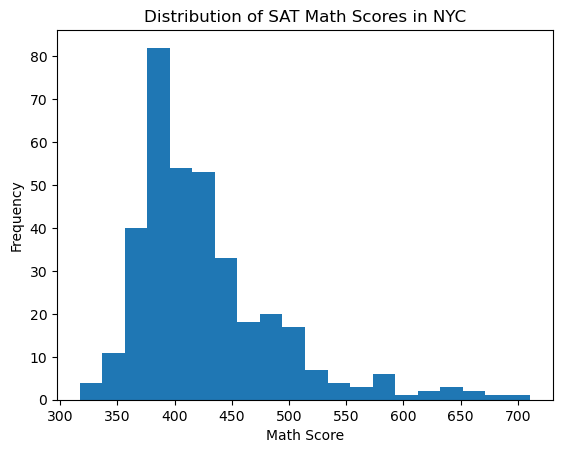

In [39]:
math_scores = satnyc['Average Score (SAT Math)']

plt.hist(math_scores, bins=20)

plt.title('Distribution of SAT Math Scores in NYC')
plt.xlabel('Math Score')
plt.ylabel('Frequency')

# Show the plot
plt.show()

The 'Average Score (SAT Math)' column in the satnyc dataset is positively skewed, it means that there are likely more students with lower math scores than higher ones. This can cause issues when building a regression model, as the model may not be able to accurately capture the relationship between the math score (dependent variable) and other independent variables. One common solution to this problem is to take the logarithm of the math score column, which can help normalize the distribution of the data and make the relationship more linear.

In [40]:
y = np.log(satnyc["Average Score (SAT Math)"])
satnyc["log_Math"] = y
y = y.fillna(y.mean())

y.head()

1    6.046891
2    6.487684
3    5.978886
4    6.035481
6    6.016157
Name: Average Score (SAT Math), dtype: float64

In [41]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X, y)
y_pred_linear = lr_model.predict(X)
from sklearn import metrics
full_mse = metrics.mean_squared_error(y, y_pred_linear)
print('Mean Squared Error:', full_mse)

Mean Squared Error: 0.0014319791728032464


The output Mean Squared Error: 0.0014319791728032464 represents the average squared difference between the predicted values of the dependent variable (Average Score (SAT Math)) and the actual values, based on a linear regression model using the independent variables, including student enrollment rate, percent of asian, average score (SAT Reading), average score (SAT Writing), and percent tested as predictors.

In this specific case, the MSE value suggests that the linear regression model has made relatively accurate predictions, with an average squared difference between the predicted and actual values of approximately 0.14%. 

#### Regression Tress

Different from OLS model, for regression tree model we are able to minimizing the MSE(Mean Squared Error), which is our ultimate goal.

$$
\min_{j,s} \left[  \sum_{i: x_{i,j} \leq s, x_i \in R1}
    (y_i - \hat{y}_{R1})^2 +  \sum_{i: x_{i,j} > s, x_i \in R2}
    (y_i - \hat{y}_{R2})^2 \right]
$$


Mean Squared Error: 0.0014298473330560083


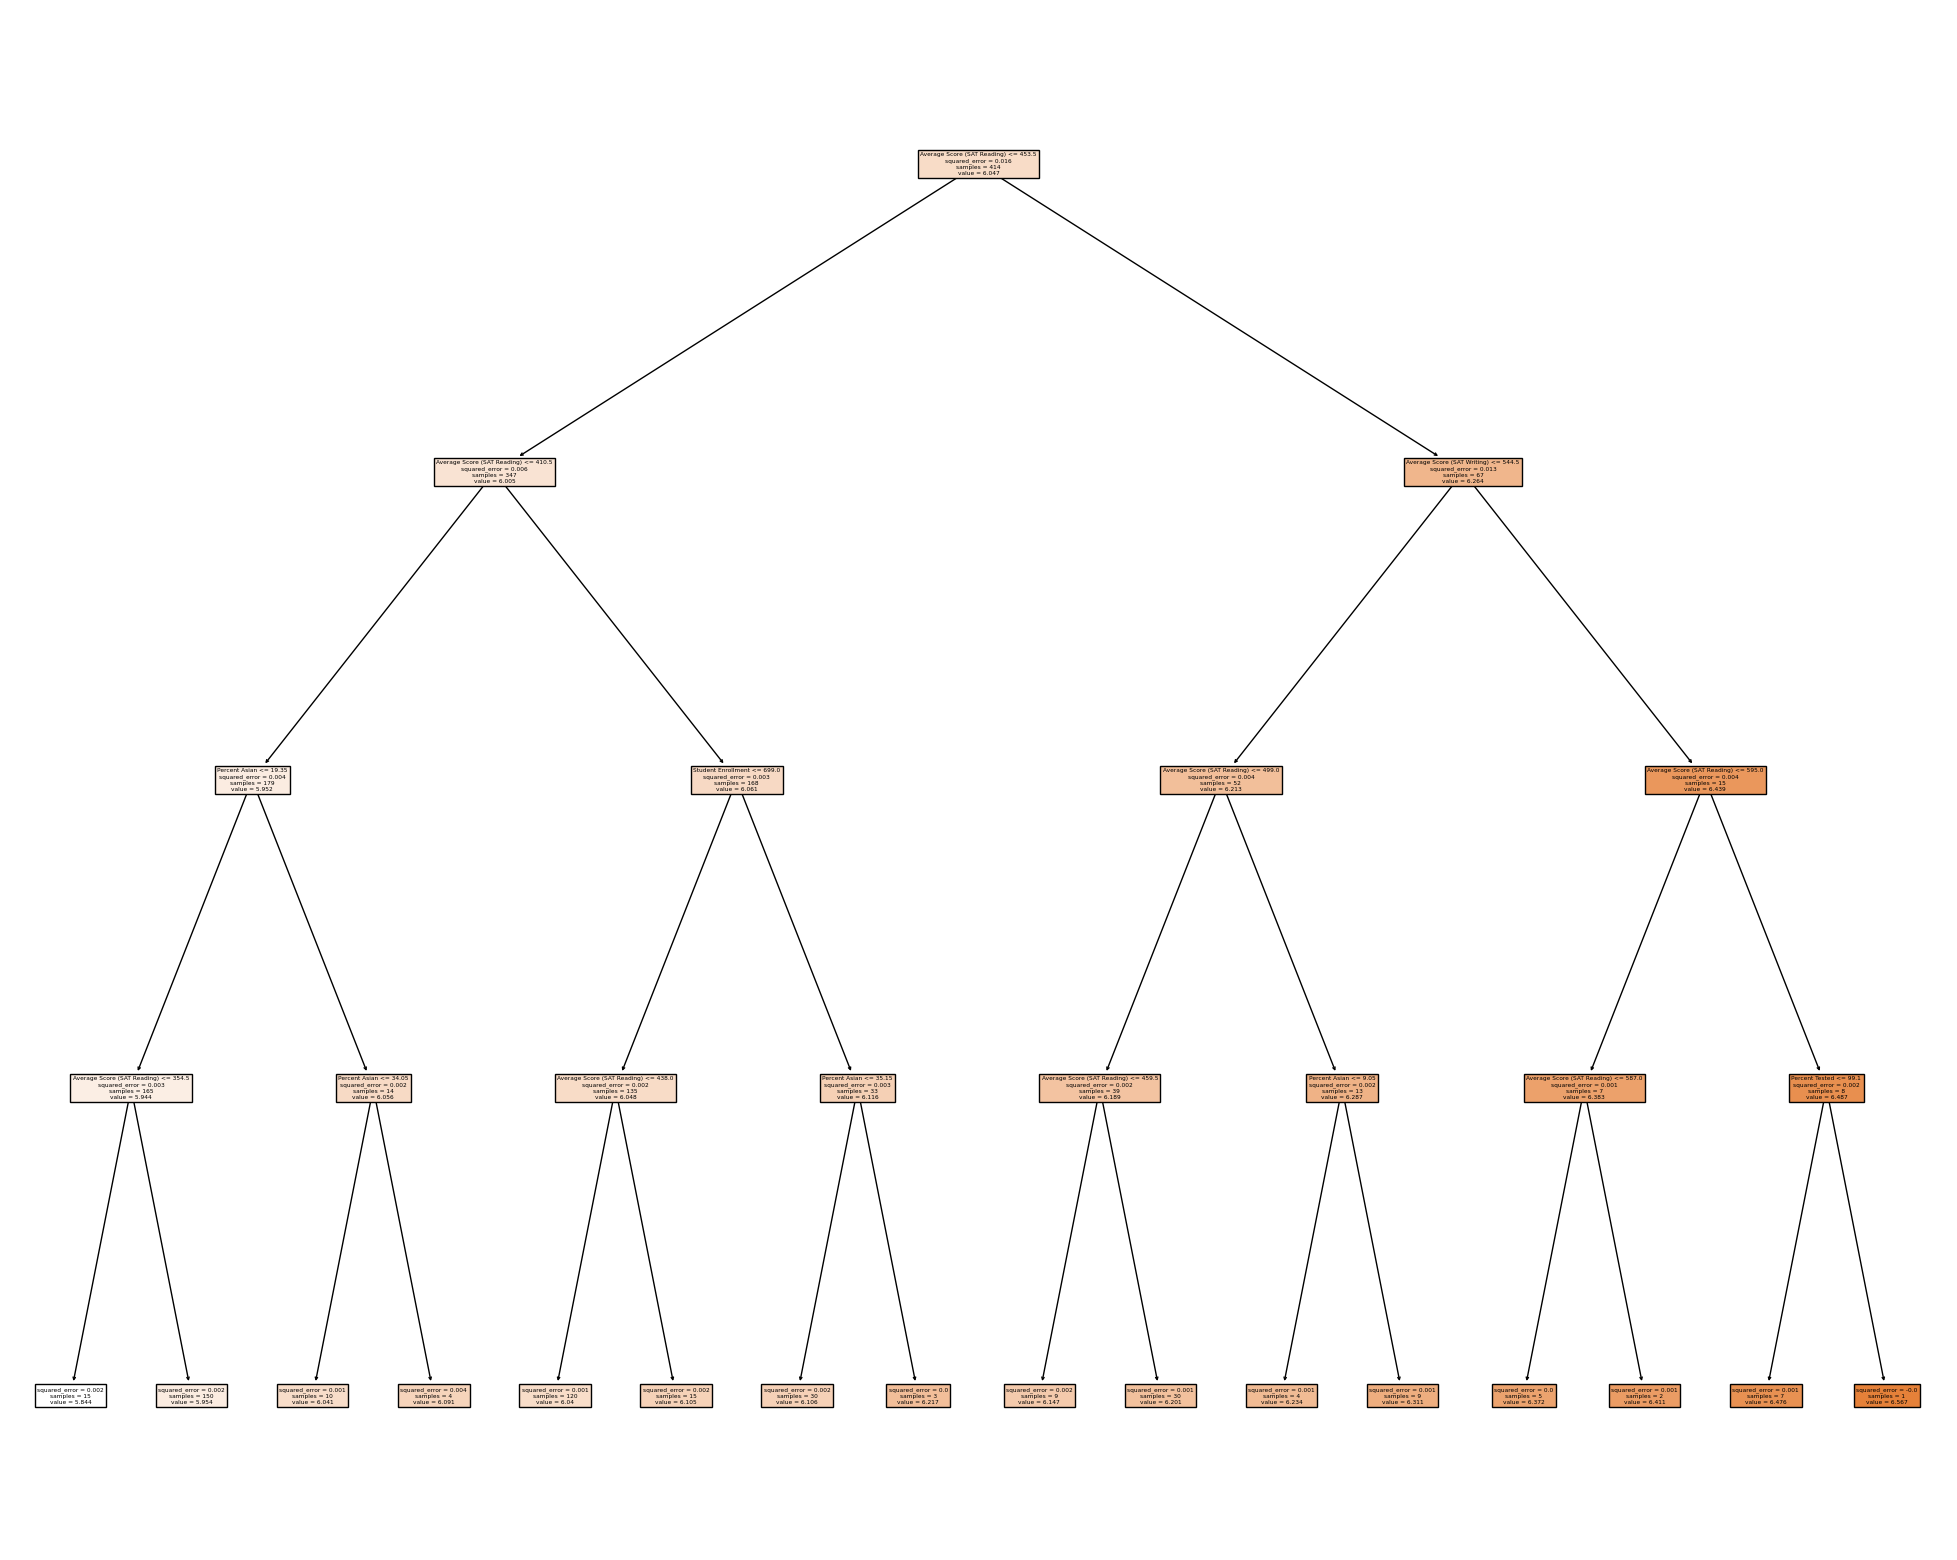

In [42]:
from sklearn import tree
sqft_tree = tree.DecisionTreeRegressor(max_depth=4).fit(X,y)
# use the fitted tree to predict
y_pred_tree = sqft_tree.predict(X)


from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred_tree))
sqrf_fig = plt.figure(figsize=(25,20))
sqrf_fig = tree.plot_tree(sqft_tree, feature_names=X.columns, filled=True)

Both the Regression Tree model and the OLS model we simulate here are designed to construct a model that can predict the `Average SAT (Math score)`.OLS is a linear model with the objective of minimizing the Residual Sum of Squares (RSS), while the Regression Tree model is a non-linear and highly complex model with the objective of minimizing the Mean Squared Error (MSE).  The common goal is to minimize the Error term to ensure the accuracy and validity of the model.

In the OLS model, we obtained a constant MSE with the addition of `5` variables. We obtained a very small value almost close to 0 out of `362` observations to prove that the idea and direction of our model construction is correct.The OLS model gives us a mathematical formulation and the simulated image is linear, allowing us to analyze it more easily.

Unlike the OLS model, the Regression Tree model can be used to obtain the minimum value of MSE by changing the number of constraints such as alpha and depth. It divides the data into several subsets with prediction constants and learns the best value through multiple simulations. It is also difficult to summarize the shape of the image because of the multiple layering, unlike the OLS model which can be directly interpreted. In this example, we chose a depth of 4 and the resulting Mean Squared Error is `0.0014298473330560083`, which is the same answer as the one generated by OLS The difference between this answer and the OLS generated `0.0014319791728032464` is not that big. As I said before, 0.001429 itself is a very small MSE value, and it is not very meaningful to reduce it to 0.0001.

Of course, we can also achieve this by setting the depth value: when setting the depth to `5`, the MSE is `0.0009300447873785928`. The MSE is indeed smaller, but we must consider whether this result is accompanied by an overfitting situation. Just like Model1, which we filtered out before because the model complexity was too high and the observation object was too small, the model in here is also extremely complex when we set it to 5 layers. It may memorize every detail of the training data and ignore the underlying general laws, leading to a decrease in generalization performance, which is one of the disadvantages of the Regression Tree model. Therefore, we chose the regression tree model with a depth of 4 and an MSE of 0.0014298 after combining the concerns from several perspectives.


## III.*Conclusion
The Impact of ethnic diversity, focusing one Asian group, on SAT Mathematics Scores is significant in both statistical and economic levels. First, the percentage of Asian students is positively correlated with higher academic achievement in mathematics, and this high correlation (0.71) is only for mathematics subjects. Second, we find that this correlation is greater when controlling for latent variables (student enrollment and test percentages). Third, when looking at the characteristics of districts with different proportions of Asian students, we find that a high percentage of Asian students who do well in math come from Queens Borough, which is middle-income and even has child poverty problems. However, the importance of social stability for academic performance is also supported by the stable security reflected in the moderate number of shootings in the neighborhood. The downside is that there are limitations to using these three variables as control variables to predict SAT Mathematics Scores because of the small number of observations, which should be considered in future studies. We were also surprised to find that while the level of racial diversity in schools also influenced SAT Mathematics Scores, it was weaker than the association between Asian population and SAT Mathematics Scores. However, it is important to note that there may be other factors that contribute to these relationships, such as socioeconomic status and cultural factors, which should be considered in future research. Ultimately, an OLS model and Regression Tree Model were conducted to fully understand the complex relationship between ethnic diversity (Asian student participation) and mathematics achievement and to control for potential bias and confounding variables. With the proportion of Asian students as the first independent variable and student enrollment, test percentages, and average reading and writing scores as auxiliary control variables, we obtained two models with very small error rates approaching zero, which statistically supports our initial suspicion that the relationship between the proportion of Asian students and math SAT scores is still the largest, even in the presence of all five variables. 

In general, this one finding also gives future policy makers a fresh perspective to inject more resource and energy into the construction of racial diversity in schools and supports Asian groups because of the positive impact this will have in the long run.
